# TOPIC MODELING - CUSTOMER FEEDBACK DESCRIPTION


<img src="https://content.webengage.com/wp-content/uploads/sites/4/2023/03/hero-image-Customer-Retention-in-BFSI.png" style="float: left;" width="400" height="100" />

# 1. Introduction

Identify and visualize the features contribute to customer retention:

Build a Topic modeling that will find the most mentioned comments from customers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [3]:
def load_data(file_path):
    """
    Load data from a CSV file.
    """
    df = pd.read_csv(r'C:\Users\mirnalini.gunaraj\Downloads\cust_complaints.csv')
    return df


In [4]:
def clean_data(df):
    """
    Clean the data by handling missing values and other data preprocessing steps.
    """
    # Drop rows with missing values in the 'Consumer complaint narrative' column
    df.dropna(subset=['Consumer complaint narrative'], inplace=True)
    return df


In [5]:
def perform_eda(df):
    """
    Perform exploratory data analysis (EDA) on the dataset.
    """
    # Basic data exploration
    print("Basic Information about the Dataset:")
    print(df.info())

    
if __name__ == "__main__":
    # Replace 'your_data.csv' with the path to your CSV file
    data_file = 'your_data.csv'

    # Load data
    df = load_data(data_file)

    # Clean data
    df = clean_data(df)

    # Perform EDA
    perform_eda(df)

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 2840 non-null   object
 1   Product                       2840 non-null   object
 2   Sub-product                   2732 non-null   object
 3   Issue                         2840 non-null   object
 4   Sub-issue                     1959 non-null   object
 5   Consumer complaint narrative  2840 non-null   object
 6   Company public response       13 non-null     object
 7   Company                       2840 non-null   object
 8   State                         2763 non-null   object
 9   ZIP code                      2840 non-null   object
 10  Tags                          498 non-null    object
 11  Consumer consent provided?    2840 non-null   object
 12  Submitted via                 2840 non-

# EDA

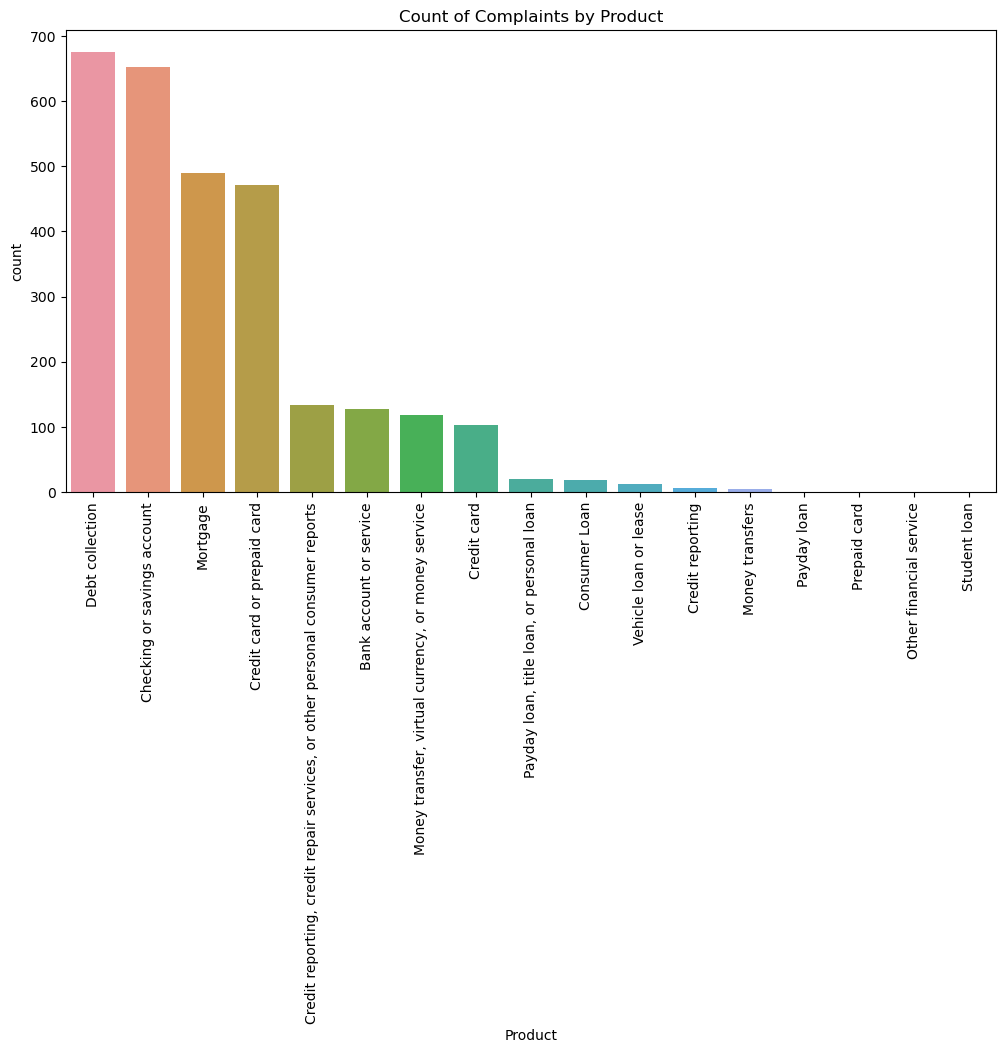

In [6]:
# Data visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Complaints by Product')
plt.show()

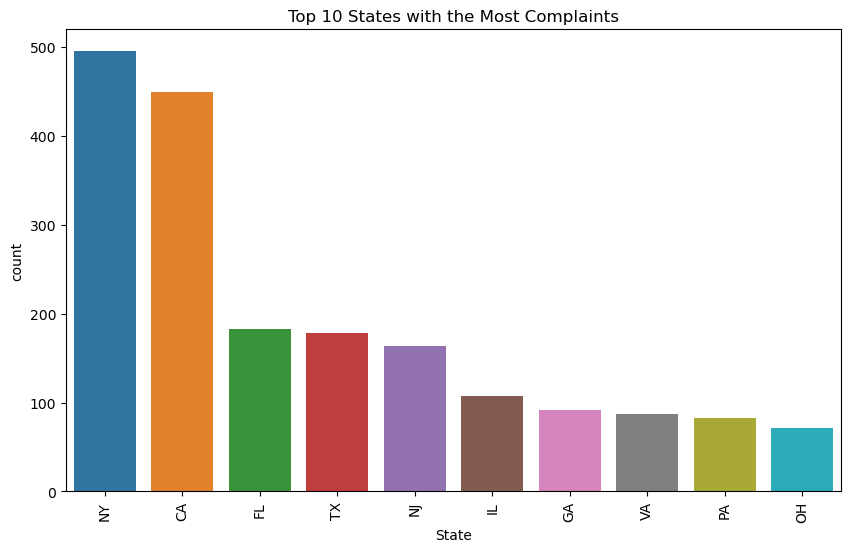

In [7]:
plt.figure(figsize=(10, 6))

# Count the number of complaints per state and select the top 10 states
top_10_states = df['State'].value_counts().head(10)

sns.countplot(data=df, x='State', order=top_10_states.index)
plt.xticks(rotation=90)
plt.title('Top 10 States with the Most Complaints')
plt.show()

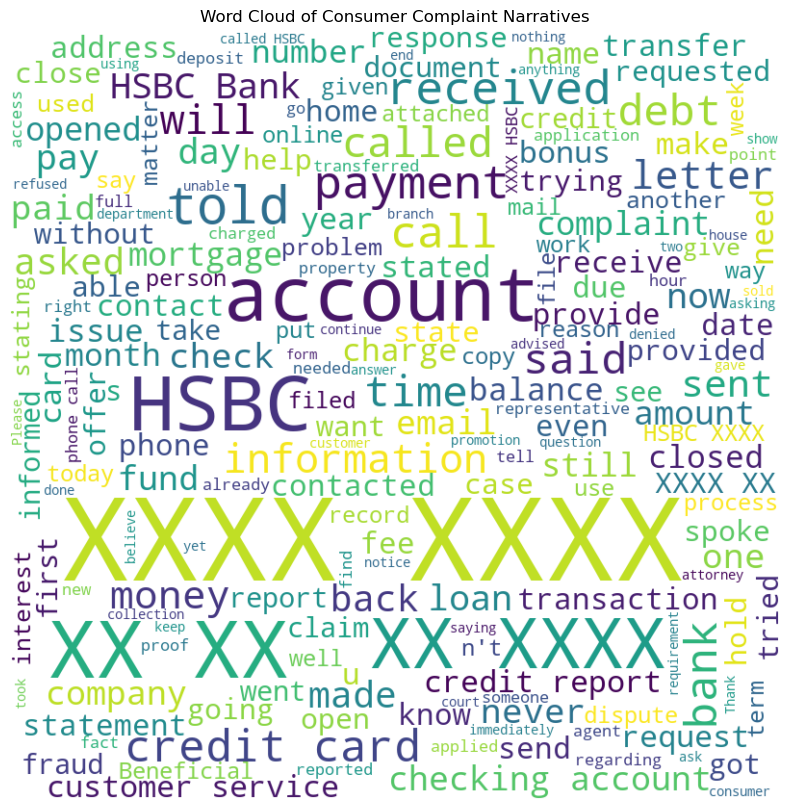

In [8]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['Consumer complaint narrative']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()


# Handling Missing Values

In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date received                      0
Product                            0
Sub-product                      108
Issue                              0
Sub-issue                        881
Consumer complaint narrative       0
Company public response         2827
Company                            0
State                             77
ZIP code                           0
Tags                            2342
Consumer consent provided?         0
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?              2017
Complaint ID                       0
dtype: int64


In [10]:
columns_to_drop = ['Tags', 'Sub-issue']
df = df.drop(columns_to_drop, axis=1)

Company Public Response and Tags field have missing values for around 95% of the data and also they are not providing meaningful insights. So, lets get rid of the feature

In [11]:
df['Consumer disputed?'].value_counts()

Consumer disputed?
No     615
Yes    208
Name: count, dtype: int64

Only 208 out of 2840 has raised disputes but we need to figure out the group which raise dispute

Summary statistics for 'Consumer disputed?' = 'Yes':
       Complaint ID
count  2.080000e+02
mean   1.797610e+06
std    3.117750e+05
min    1.294937e+06
25%    1.546063e+06
50%    1.778080e+06
75%    2.019826e+06
max    2.422466e+06


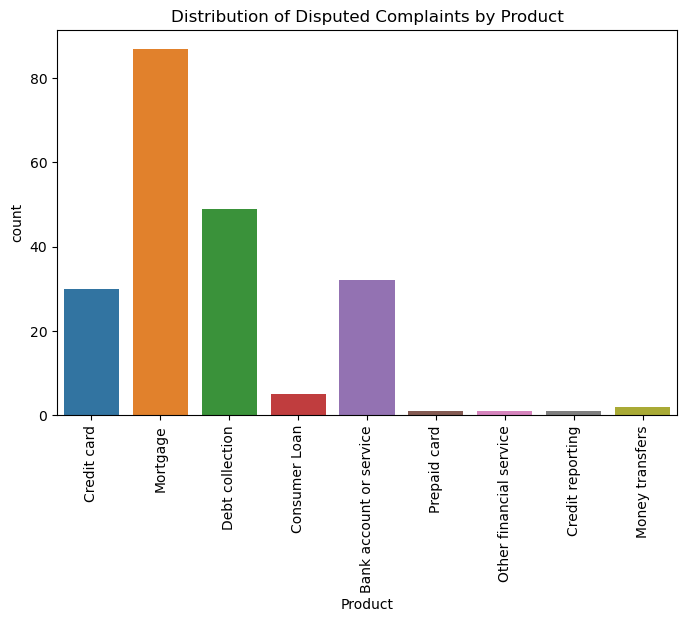

In [12]:
# Filter the DataFrame to only include rows where 'Consumer disputed?' is 'Yes'
disputed_complaints = df[df['Consumer disputed?'] == 'Yes']

# Summary statistics
print("Summary statistics for 'Consumer disputed?' = 'Yes':")
print(disputed_complaints.describe())

# Countplot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=disputed_complaints, x='Product')
plt.xticks(rotation=90)
plt.title('Distribution of Disputed Complaints by Product')
plt.show()

Most of the disputes arises within Mortgage and Debt Collection

In [13]:
df['Consumer complaint narrative']

0       On XX/XX/XXXX I received a text message @ XXXX...
1       Company called XXXX called my husband, claimin...
2       I received a voicemail from private investigat...
3       Hello, On Wednesday, XX/XX/XXXX I began receiv...
4       Complaint against HSBC, NA Good morning, an As...
                              ...                        
2835    Hello. Back between XXXX I had a mastercard, e...
2836    Payment made are debited from my bank and post...
2837    hsbc needs to clear this off my cr report, thi...
2838    COMPLAINT No.1 : In early XXXX, my wife ( XXXX...
2839    I recently set up a checking account with HSBC...
Name: Consumer complaint narrative, Length: 2840, dtype: object

# Text Cleaning

In [14]:
import re
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords dataset (only needed once)
nltk.download('stopwords')

# Define a function to clean and preprocess text, including stopword removal
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove anonymized characters like "xxxxxxxx"
    text = re.sub(r'\b[x]+\b', '', text)

    # Tokenize the text (split it into words)
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the cleaning function to the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirnalini.gunaraj\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['Consumer complaint narrative'].sample

<bound method NDFrame.sample of 0       received text message free hsbc fraud msg char...
1       company called called husband claiming debt ne...
2       received voicemail private investigator xxxxhe...
3       hello wednesday began receiving repeated calls...
4       complaint hsbc na good morning assign release ...
                              ...                        
2835    hello back mastercard ending hsbc paid years a...
2836    payment made debited bank posted credit card a...
2837              hsbc needs clear cr report settle since
2838    complaint early wife mortgagor agreed mortgage...
2839    recently set checking account hsbc take advant...
Name: Consumer complaint narrative, Length: 2840, dtype: object>

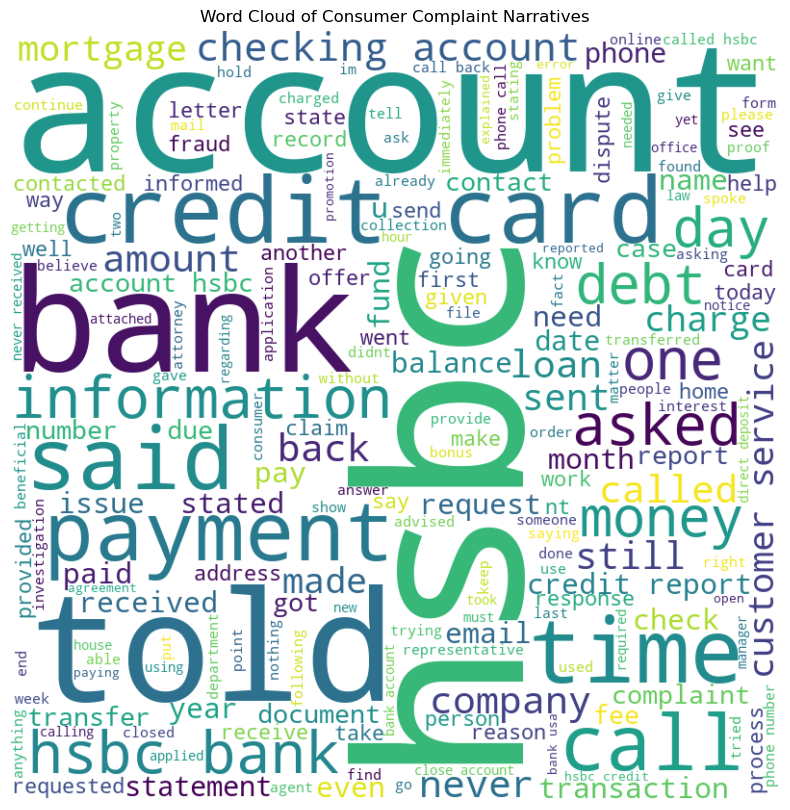

In [16]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['Consumer complaint narrative']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

In [17]:
def remove_stopwords_and_custom(text):
    words = text.split()
    common_stopwords = stopwords.words('english')
    custom_words_to_remove = ["hsbc", "bank"]
    filtered_words = [word for word in words if word.lower() not in common_stopwords and word.lower() not in custom_words_to_remove]
    return ' '.join(filtered_words)

In [18]:
# Apply the remove_stopwords_and_custom function to the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(remove_stopwords_and_custom)

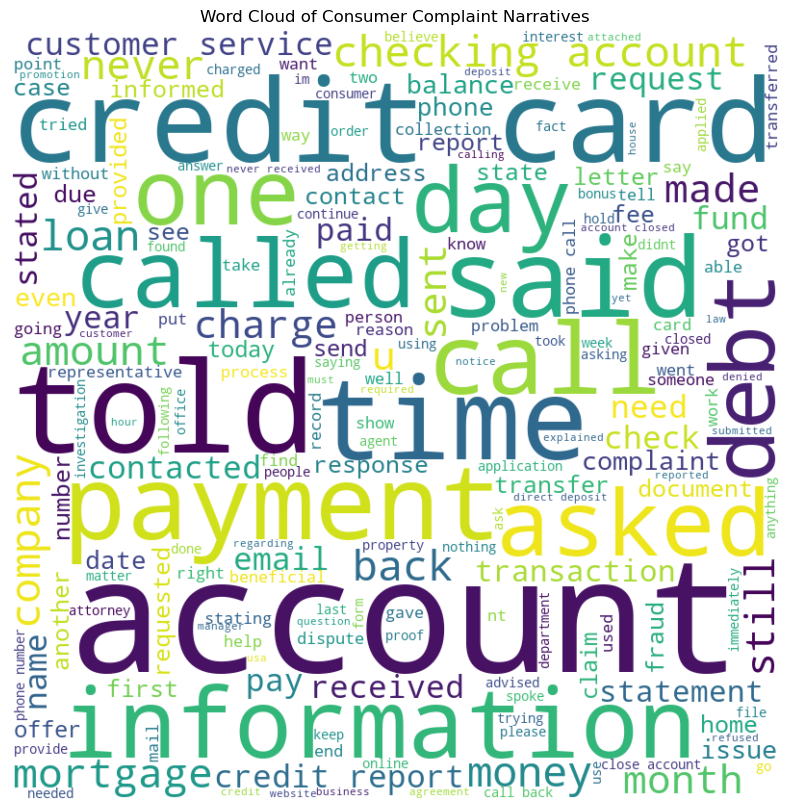

In [19]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['Consumer complaint narrative']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

In [20]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def filter_words_by_pos(text, allowed_pos):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    filtered_words = [word for word, pos in pos_tags if pos in allowed_pos]
    return ' '.join(filtered_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirnalini.gunaraj\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


In [21]:
# Define the allowed parts of speech
allowed_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']

# Apply the function to the 'Consumer complaint narrative' column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(lambda x: filter_words_by_pos(x, allowed_pos))

In [22]:
#import nltk
#nltk.download()

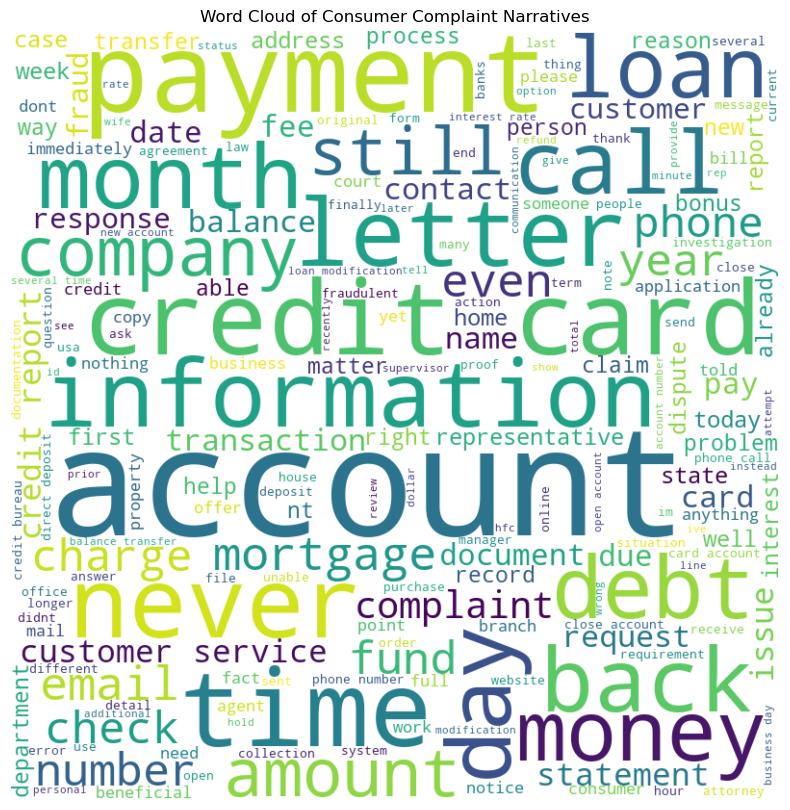

In [23]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['Consumer complaint narrative']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

In [24]:
df['Product'].value_counts()

Product
Debt collection                                                                 675
Checking or savings account                                                     653
Mortgage                                                                        490
Credit card or prepaid card                                                     471
Credit reporting, credit repair services, or other personal consumer reports    134
Bank account or service                                                         128
Money transfer, virtual currency, or money service                              119
Credit card                                                                     103
Payday loan, title loan, or personal loan                                        20
Consumer Loan                                                                    18
Vehicle loan or lease                                                            13
Credit reporting                                                    

In [25]:
df['Company'].value_counts()

Company
HSBC NORTH AMERICA HOLDINGS INC.           2802
CAPITAL ONE FINANCIAL CORPORATION            13
WELLS FARGO & COMPANY                         4
Ocwen Financial Corporation                   3
Caliber Home Loans, Inc.                      2
Ditech Financial LLC                          2
JPMORGAN CHASE & CO.                          2
Specialized Loan Servicing Holdings LLC       2
EQUIFAX, INC.                                 2
Santander Consumer USA Holdings Inc.          1
Experian Information Solutions Inc.           1
ABR Recovery Services LLC.                    1
CITIBANK, N.A.                                1
Mr. Cooper Group Inc.                         1
Resurgent Capital Services L.P.               1
SELECT PORTFOLIO SERVICING, INC.              1
CAVALRY INVESTMENTS, LLC                      1
Name: count, dtype: int64

In [26]:
complaints_df=df[['Consumer complaint narrative','Product','Company']].rename(columns={'Consumer complaint narrative':'complaints'})

In [27]:
pd.set_option('display.max_colwidth',None)
complaints_df

,complaints,Product,Company
0,text message free fraud msg charge sq yes help top card fraud respond due receiving messages message text contact frauds credit card call wrong phone credit card frauds dept also dates times amounts location card charges charges charges account max text last charge text free fraud msg hyou charge yes help stop card fraud alerts business go line card illegally also police dept inquire criminal charges officer fraud affidavit branch office copy credit card charges district manager serveral calls report branch manager intervine behalf charge manager phone frauds dept customer branch copy charges information rep email updated fraud claim form able form local police form police enclosed form wasnt correct form also see copy promotional apr offer dated days credit card account blank checks name legal name attention branch manager frauds dept way call employee offer new however able use blank checks account sign checks also account passport booklet however customer name interest informed account someone else account little leary account whole date birth lastly personal information home equity loan error cyber world also life insurance company union alerts accounts money store credit cards police file criminal complaint enclosures copies fraud claim form promotional apr blank checks chargeback information pages thief cell phone account,Credit card or prepaid card,HSBC NORTH AMERICA HOLDINGS INC.
1,company husband debt care care right court notification prior notice company phone day speak wife debt holder multiple times lady spoke husband supervisor finally claimed debt almost years ago pay least today judgement extremely nice back way respect elders liar cut chance mom doctor appointment excuses overall horrible conversation cant anything legit company theyve multiple numbers none numbers information,Debt collection,HSBC NORTH AMERICA HOLDINGS INC.
2,voicemail private investigator xxxxhe message phone daughters phone moms phone phone back spoke mrxxxx pi doesnt work office debt paper days ago never never anything need pay dont recognize today money job due covid hold ask lower amount xxxxtosettle today card court fee id pay fees go ligation group previous people scammers mr receive paper email already paper days ago never forcing pay today,Debt collection,HSBC NORTH AMERICA HOLDINGS INC.
3,hello calls least personal phone number message message process facilitate civil complaint means protocol locate place employment residence order prior client legal action contact first directly order give statement descent mediation please contact mediation department otherwise well list direct receivable youll appear official notification call day company name option different departments thursday caller firstlast name last social security number old credit card account number state credit card chargedoff incollection credit card debt caller county court information account number even full company name caller phone numbers,Debt collection,HSBC NORTH AMERICA HOLDINGS INC.
4,complaint na good morning assign release form poas wire amount mothers funds fraudulently agreement drawn return right away due care mom finally sign agreement easy task date document recently swift wire funds email communication poa funds credited mothers agreement financial decisions contingent funds mother cover expenses senior facility time claim swift last communication swift number correct weeks days months swift numbers time,Checking or savings account,HSBC NORTH AMERICA HOLDINGS INC.
...,...,...,...
2835,hello back mastercard years ago disputes back kept collections agencies credit long last time information back credit call company ph garnish wages summons door step contact employer strick action file suit court file collections pay balance immediately explained years credit back years ago credit report day notice even current rating many consumers exactly way last weeks specifically collect debt old debt complaints public illegal collect

# Latent Dirichlet Allocation (LDA)
LDA is a popular topic modeling technique used in natural language processing (NLP) and machine learning to uncover hidden topics within a collection of documents. LDA assumes that documents are mixtures of topics and that words in documents are attributed to these topics.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_hold = train_test_split(complaints_df, test_size=0.6, random_state=111)

In [29]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [30]:
def tokenize(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2) ] 
   #stems = [stemmer.stem(item) for item in tokens]
   return tokens

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, min_df=50, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.complaints)

C:\Users\mirnalini.gunaraj\.ms-ad\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [33]:
tf_vectors.A

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  0.,  0.,  1.],
       [ 2.,  3., 24., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [34]:
vectorizer_tf.get_feature_names_out()

array(['able', 'access', 'account', 'accounts', 'action', 'additional',
       'address', 'agency', 'agent', 'agreement', 'application',
       'attorney', 'available', 'balance', 'banking', 'banks',
       'beneficial', 'bonus', 'branch', 'business', 'calls', 'card',
       'cards', 'case', 'cfpb', 'charge', 'charges', 'check', 'claim',
       'close', 'collect', 'collection', 'company', 'complaint',
       'consumer', 'contact', 'copy', 'correct', 'court', 'credit',
       'current', 'customer', 'customers', 'date', 'days', 'debt',
       'department', 'deposit', 'details', 'didnt', 'different', 'direct',
       'dispute', 'documentation', 'documents', 'dont', 'email', 'error',
       'fact', 'false', 'fees', 'file', 'finally', 'financial', 'fraud',
       'fraudulent', 'funds', 'good', 'help', 'history', 'hold', 'home',
       'hours', 'house', 'identity', 'illegal', 'immediately',
       'information', 'instead', 'investigation', 'issue', 'issues',
       'know', 'late', 'later', '

In [35]:
from sklearn import decomposition
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [36]:
num_words=15

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [37]:
topics

['account money check customer phone service transfer online funds number time manager information days branch',
 'debt number phone company court address information years legal case state attorney proof contact time',
 'account bonus deposit months terms month days direct offer promotion weeks premier customer open times',
 'mortgage loan payment payments home beneficial rate property years time monthly letter agreement house information',
 'account card credit fraud funds information transaction time letter department money dispute charges days balance',
 'credit payment card account report debt letter collection balance information late company statement payments years']

In [38]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.complaints))]
df_doc_topic = pd.DataFrame(np.round(W1, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [39]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.04,0.04,0.79,0.04,0.04,0.04,2
Doc1,0.03,0.83,0.03,0.03,0.03,0.03,1
Doc2,0.01,0.01,0.01,0.95,0.01,0.01,3
Doc3,0.03,0.76,0.13,0.03,0.03,0.03,1
Doc4,0.09,0.00,0.00,0.28,0.00,0.62,5
...,...,...,...,...,...,...,...
Doc1131,0.01,0.29,0.01,0.01,0.01,0.67,5
Doc1132,0.00,0.00,0.87,0.00,0.11,0.00,2
Doc1133,0.01,0.01,0.01,0.01,0.19,0.78,5
Doc1134,0.00,0.11,0.04,0.00,0.56,0.28,4


In [40]:
X_train.head()

,complaints,Product,Company
2394,deal wherein new account pay bills month andor direct deposits bill portion use special portal nowhere bills excuse pay,Bank account or service,HSBC NORTH AMERICA HOLDINGS INC.
1503,debt collection agency law firm friends family even docket number show job,Debt collection,HSBC NORTH AMERICA HOLDINGS INC.
1046,husband second mortgage year loan draw backs save dream loan current however mortgage company different amount save dream experience report different reporting mortgage company payment see lesser amount loan work help,Mortgage,HSBC NORTH AMERICA HOLDINGS INC.
1422,debt confirmation letters received lien still several times lien release straight answers still days debt,Mortgage,HSBC NORTH AMERICA HOLDINGS INC.
145,letterstatement datedxxxxxxxx company contain alleged amount due behalf onxxxxxxxx agents old hfc debt collection agent nd rd mortgage house letter identical first settlement opportunity letter amount half amount phone call agent house statute limitations collect debt years hfc payment statute still middle impossible money house longer even statute run still debt longer right pursue collection years hfc statements first statement last records last second statement last payment hfc check cashed hfc carbon copy check statement account hfc statement amount past due last payment forward months thexxxxxxxx statement monthly amount due approximately idea payment nt years ago,Debt collection,HSBC NORTH AMERICA HOLDINGS INC.


In [41]:
WHold = lda.transform(vectorizer_tf.transform(X_hold.complaints[:5]))

In [42]:
colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.complaints[:5]))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [43]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,dominant_topic
Doc0,0.14,0.01,0.51,0.01,0.33,0.01,2
Doc1,0.14,0.01,0.84,0.01,0.01,0.01,2
Doc2,0.45,0.01,0.01,0.01,0.53,0.01,4
Doc3,0.01,0.18,0.01,0.80,0.01,0.01,3
Doc4,0.51,0.01,0.01,0.01,0.45,0.01,0


In [44]:
X_hold.head()

,complaints,Product,Company
1892,location currently return interest safe deposit payments account account belong father deceased years death times solely father account safety deposit box government officials search warrant safety deposit box assets communication summer branch persons numerous mail email communication portions check unclaimed funds safe deposit box rental communication provide correspondence estate settlement safety deposit box order dispute amount refund,Checking or savings account,HSBC NORTH AMERICA HOLDINGS INC.
148,mailer unique code account offer new money account immediately money wait almost months promotion bonus weeks days months customer service whats open case noone contacts weeks later account reasons reason relationship last years relationship couldnt identify anything location couldnt couldnt find system give info nd reason didnt offer attached account ridiculous unique code send apply successfully feel bonus reasons bonus bogus noway anything disprove anything,Checking or savings account,HSBC NORTH AMERICA HOLDINGS INC.
736,excellent financial user regulations right open account remotely united states year application united states months communicate reply always provide statement source funding money father provide statement mind thought part money salary payslip time still information father unreasonable right refuse provide addition states many times relevant department problem invalid still calls,Checking or savings account,HSBC NORTH AMERICA HOLDINGS INC.
1512,home unlawfully sheriff sale usa national association indenture trustee securitization trust callable notes series foreclosure sale illegally authorized usa loss mitigation process employees verbally proof foreclosure place loss mitigation process single point contact spoc manage loss mitigation process recently company income support loan modification plan prior sale home new spoc home prior discussion person information support loss mitigation process decision never date decision loss mitigation evaluation process loss mitigation request review decision prior sale home lender local law firm home new documents foreclosure sale particular date customer service division loss mitigation plan foreclosure sale process dual tracking illegal,Mortgage,JPMORGAN CHASE & CO.
2599,savings account security accounts savings locked money accounts spoke officer accounts check amount drawn second savings fraudulent check savings cashed account office dealing problem responses monies notification additionally reward points credit card,Checking or savings account,HSBC NORTH AMERICA HOLDINGS INC.


In [51]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'used','using','use','model','one','two','set'])
"""
    Functions for converting sentence to words
"""  
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
"""
    Functions removing the stopwords 
"""        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df['Consumer complaint narrative'].values.tolist()#creating the array of token 
data_words = list(sent_to_words(data))#converting them into list

data_words = remove_stopwords(data_words)# remove stop words
print(data_words[:1][0][:30])

['text', 'message', 'free', 'fraud', 'msg', 'charge', 'sq', 'yes', 'help', 'top', 'card', 'fraud', 'respond', 'due', 'receiving', 'messages', 'message', 'text', 'contact', 'frauds', 'credit', 'card', 'call', 'wrong', 'phone', 'credit', 'card', 'frauds', 'dept', 'also']


In [52]:
# Create Dictionary 
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing the corpus in a numeric form which implies the frequency of the word
print(corpus[:1][0][:30])

[(0, 2), (1, 8), (2, 1), (3, 1), (4, 2), (5, 5), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 4), (14, 1), (15, 2), (16, 1), (17, 8), (18, 1), (19, 1), (20, 4), (21, 1), (22, 6), (23, 4), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3)]


In [53]:
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import gensim.corpora as corpora # for mapping words to integers
from nltk.corpus import stopwords

In [54]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"account" + 0.011*"information" + 0.010*"time" + 0.010*"payment" + '
  '0.009*"call" + 0.008*"credit" + 0.008*"number" + 0.007*"card" + '
  '0.007*"also" + 0.007*"debt"'),
 (1,
  '0.027*"account" + 0.014*"credit" + 0.012*"card" + 0.011*"payment" + '
  '0.011*"payments" + 0.011*"debt" + 0.010*"mortgage" + 0.009*"number" + '
  '0.007*"customer" + 0.007*"time"'),
 (2,
  '0.044*"account" + 0.026*"credit" + 0.012*"card" + 0.011*"time" + '
  '0.009*"money" + 0.009*"payment" + 0.009*"never" + 0.008*"balance" + '
  '0.007*"back" + 0.007*"letter"'),
 (3,
  '0.028*"account" + 0.012*"credit" + 0.009*"payment" + 0.008*"mortgage" + '
  '0.008*"time" + 0.007*"card" + 0.007*"amount" + 0.007*"money" + '
  '0.007*"information" + 0.007*"email"'),
 (4,
  '0.029*"account" + 0.027*"credit" + 0.023*"card" + 0.014*"balance" + '
  '0.008*"payment" + 0.008*"new" + 0.007*"time" + 0.007*"transfer" + '
  '0.007*"days" + 0.007*"report"'),
 (5,
  '0.028*"account" + 0.018*"card" + 0.011*"funds" + 0.009

In [56]:
pip install pyLDAvis


     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
      --------------------------------------- 0.0/2.6 MB 393.8 kB/s eta 0:00:07
     --- ------------------------------------ 0.2/2.6 MB 1.7 MB/s eta 0:00:02
     ---------------- ----------------------- 1.0/2.6 MB 6.0 MB/s eta 0:00:01
     --------------------------- ------------ 1.8/2.6 MB 8.2 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 9.7 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/67.1 kB ? eta -:--:--
     ------------------------------------ --- 61.4/67.1 kB ? eta -:--:--
     -------------------------------------- 67.1/67.1 kB 917.5 kB/s eta 0:00:00
  Preparing m

In [57]:
import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualizati

# LDA Visualisation

In [63]:
# Visualize the topics
pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join(master_path,'02_Results','ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

pyLDAvis.save_html(LDAvis_prepared,'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=                  x         y  topics  cluster       Freq
topic                                                    
9      5.903659e-03 -0.028622       1        1  21.405856
2      1.160157e-02  0.009898       2        1  14.053461
5      4.288094e-02  0.004217       3        1  11.483542
3     -3.400872e-03  0.007410       4        1  10.321710
4      3.722339e-03  0.030540       5        1  10.076743
6     -2.115887e-03  0.004695       6        1   8.369968
8     -2.213157e-02 -0.003269       7        1   7.682881
7     -3.289153e-02  0.011787       8        1   6.095366
1     -9.277355e-07 -0.005792       9        1   5.778123
0     -3.567732e-03 -0.030864      10        1   4.732350, topic_info=           Term         Freq        Total Category  logprob  loglift
31       credit  3313.000000  3313.000000  Default  30.0000  30.0000
129        debt  1534.000000  1534.000000  Default  29.0000  29.0000
1       account  5412.000000  5412.000000  Default  28.0000  28.0000
17         card  2266.000000  2266.000000  Default  27.0000  27.0000
672    mortgage  1181.000000  1181.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
25      company    42.000071  1067.142939  Topic10  -5.3883  -0.1843
300      letter    40.124664  1130.210590  Topic10  -5.4340  -0.2874
203  department    33.451496   596.174083  Topic10  -5.6159   0.1703
73         loan    37.348081  1201.027717  Topic10  -5.5057  -0.4199
183       never    37.385393  1265.959988  Topic10  -5.5047  -0.4716

[866 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3627      8  0.527074   aaec
7682      8  0.531409  abibe
2354      2  0.485934    abr
2354      6  0.161978    abr
2354      9  0.161978    abr
...     ...       ...    ...
161       7  0.153747  years
161       8  0.088600  years
161       9  0.041694  years
161      10  0.035179  years
8140      6  0.423054    ytd

[2410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 6, 4, 5, 7, 9, 8, 2, 1])